## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [22]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import pandas as pd

In [62]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

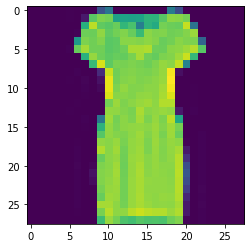

In [6]:
plt.imshow(train_images[20,:,:])
plt.show()

In [63]:
train_images.shape

(60000, 28, 28)

In [64]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [65]:
print(train_images.shape) # (60000, 28, 28)
print(test_images.shape)  # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [66]:
# Flatten the images.
train_images = train_images.reshape((-1, train_images.shape[1] * train_images.shape[2]))
test_images = test_images.reshape((-1, test_images.shape[1] * test_images.shape[2]))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [12]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [67]:
model1 = Sequential(name='my_model1')
model1.add(Dense(128, activation='relu', input_shape=(784,)))

model1.add(Dense(10, activation='softmax'))

In [117]:
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [69]:
model1.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [118]:

# Train the model.
hh = model1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model1.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2884 - accuracy: 0.8929 - val_loss: 0.3531 - val_accuracy: 0.8727
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.8999 - val_loss: 0.3523 - val_accuracy: 0.8742
Epoch 3/5
1500/1500 [==============================] - 1s 880us/step - loss: 0.2603 - accuracy: 0.9038 - val_loss: 0.3385 - val_accuracy: 0.8807
Epoch 4/5
1500/1500 [==============================] - 1s 853us/step - loss: 0.2495 - accuracy: 0.9071 - val_loss: 0.3321 - val_accuracy: 0.8865
Epoch 5/5
313/313 [==============================] - 0s 955us/step - loss: 0.3526 - accuracy: 0.8791
[9 2 1 1 6]
[9 2 1 1 6]


In [17]:
hh.history

{'loss': [0.5075510144233704,
  0.3879404664039612,
  0.34890320897102356,
  0.32252010703086853,
  0.30242010951042175],
 'accuracy': [0.817062497138977,
  0.8597708344459534,
  0.8732708096504211,
  0.8819791674613953,
  0.8884791731834412],
 'val_loss': [0.43672165274620056,
  0.36917129158973694,
  0.36532026529312134,
  0.33834949135780334,
  0.34206974506378174],
 'val_accuracy': [0.8368333578109741,
  0.8641666769981384,
  0.8684166669845581,
  0.8778333067893982,
  0.8755833506584167]}

In [18]:
model2 = Sequential(name='my_model2')
model2.add(Dense(64, activation='relu', input_shape=(784,)))

model2.add(Dense(10, activation='softmax'))

In [19]:
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [20]:
model2.summary()

Model: "my_model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [21]:

# Train the model.
hh2 = model2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model2.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Predict on the first 5 test images.
predictions = model2.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 1s 938us/step - loss: 0.5190 - accuracy: 0.8161 - val_loss: 0.4758 - val_accuracy: 0.8323
Epoch 2/5
1500/1500 [==============================] - 1s 684us/step - loss: 0.4023 - accuracy: 0.8547 - val_loss: 0.3965 - val_accuracy: 0.8596
Epoch 3/5
1500/1500 [==============================] - 1s 775us/step - loss: 0.3651 - accuracy: 0.8682 - val_loss: 0.3656 - val_accuracy: 0.8685
Epoch 4/5
1500/1500 [==============================] - 1s 688us/step - loss: 0.3417 - accuracy: 0.8746 - val_loss: 0.3805 - val_accuracy: 0.8610
Epoch 5/5
313/313 [==============================] - 0s 797us/step - loss: 0.3704 - accuracy: 0.8679
[9 2 1 1 6]
[9 2 1 1 6]


In [28]:
layers1 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]
layers2 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]
layers3 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]

In [29]:
model3 = Sequential(layers1)
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [30]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
model4 = Sequential(layers2)
model4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [32]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [33]:
model5 = Sequential(layers3)
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [34]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [42]:
def hhl(models):
    hh = models.fit(
      train_images,
      to_categorical(train_labels),
      epochs=25,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
    models.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = models.predict(test_images[:5])
    
    # Print our model's predictions.
    print(np.argmax(predictions, axis=1)) 

    # Check our predictions against the ground truths.
    print(test_labels[:5])
    
    return hh


In [43]:
hh_1 = hhl(model3)

Epoch 1/25
1500/1500 [==============================] - 1s 752us/step - loss: 0.2926 - accuracy: 0.8913 - val_loss: 0.3518 - val_accuracy: 0.8752
Epoch 2/25
1500/1500 [==============================] - 1s 726us/step - loss: 0.2810 - accuracy: 0.8963 - val_loss: 0.3364 - val_accuracy: 0.8830
Epoch 3/25
1500/1500 [==============================] - 1s 735us/step - loss: 0.2672 - accuracy: 0.9007 - val_loss: 0.3218 - val_accuracy: 0.8862
Epoch 4/25
1500/1500 [==============================] - 1s 743us/step - loss: 0.2590 - accuracy: 0.9036 - val_loss: 0.3355 - val_accuracy: 0.8800
Epoch 5/25
1500/1500 [==============================] - 1s 767us/step - loss: 0.2518 - accuracy: 0.9068 - val_loss: 0.3403 - val_accuracy: 0.8794
Epoch 6/25
1500/1500 [==============================] - 1s 727us/step - loss: 0.2405 - accuracy: 0.9110 - val_loss: 0.3442 - val_accuracy: 0.8782
Epoch 7/25
1500/1500 [==============================] - 1s 730us/step - loss: 0.2351 - accuracy: 0.9119 - val_loss: 0.3324 -

In [44]:
hh_2 = hhl(model4)

Epoch 1/25
1500/1500 [==============================] - 1s 915us/step - loss: 0.3069 - accuracy: 0.8873 - val_loss: 0.3410 - val_accuracy: 0.8780
Epoch 2/25
1500/1500 [==============================] - 1s 791us/step - loss: 0.2905 - accuracy: 0.8912 - val_loss: 0.3640 - val_accuracy: 0.8735
Epoch 3/25
1500/1500 [==============================] - 1s 846us/step - loss: 0.2790 - accuracy: 0.8946 - val_loss: 0.3478 - val_accuracy: 0.8789
Epoch 4/25
1500/1500 [==============================] - 1s 849us/step - loss: 0.2705 - accuracy: 0.8989 - val_loss: 0.3421 - val_accuracy: 0.8811
Epoch 5/25
1500/1500 [==============================] - 1s 894us/step - loss: 0.2617 - accuracy: 0.9014 - val_loss: 0.3288 - val_accuracy: 0.8822
Epoch 6/25
1500/1500 [==============================] - 1s 862us/step - loss: 0.2493 - accuracy: 0.9077 - val_loss: 0.3447 - val_accuracy: 0.8780
Epoch 7/25
1500/1500 [==============================] - 1s 841us/step - loss: 0.2462 - accuracy: 0.9075 - val_loss: 0.3484 -

In [45]:
hh_3 = hhl(model5)

Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3465 - accuracy: 0.8745 - val_loss: 0.4007 - val_accuracy: 0.8608
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3339 - accuracy: 0.8786 - val_loss: 0.3696 - val_accuracy: 0.8673
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3226 - accuracy: 0.8824 - val_loss: 0.3856 - val_accuracy: 0.8626
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3148 - accuracy: 0.8838 - val_loss: 0.3707 - val_accuracy: 0.8687
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3056 - accuracy: 0.8890 - val_loss: 0.3765 - val_accuracy: 0.8723
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2978 - accuracy: 0.8914 - val_loss: 0.3593 - val_accuracy: 0.8786
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2906 - accuracy: 0.8934 - val_loss: 0.3766 - val_accuracy:

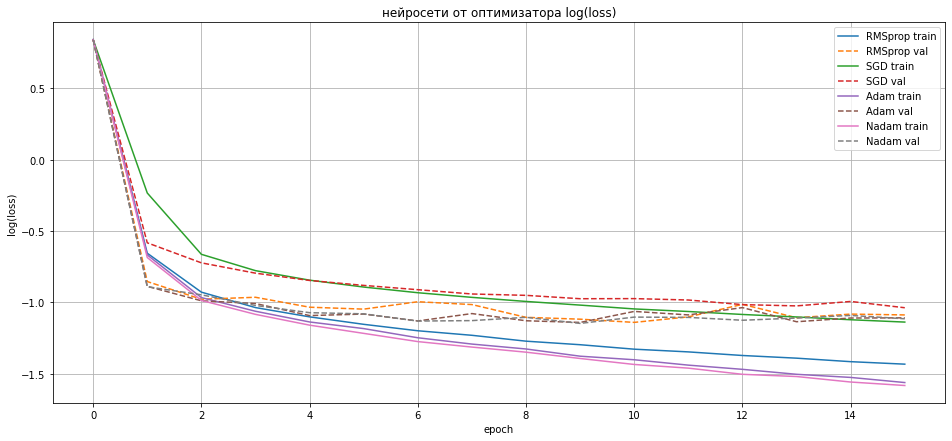

In [41]:
# создаем модель model
model = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

Лучшим вариантом является SGD, так как наименьший разрыв между accuracy и val_accuracy.

In [71]:
hh_t = {}
hh_a = []
hh_v = []
hh_list = [hh, hh2, hh_1, hh_2, hh_3]
for i in hh_list:
    hh_a.append(i.history['accuracy'][-1])
    hh_v.append(i.history['val_accuracy'][-1])
    
    
hh_t['accuracy'] = hh_a
hh_t['val_accuracy'] = hh_v

In [72]:
hh_t

{'accuracy': [0.8886041641235352,
  0.8813750147819519,
  0.9471250176429749,
  0.9393541812896729,
  0.9155416488647461],
 'val_accuracy': [0.8776666522026062,
  0.8733333349227905,
  0.8776666522026062,
  0.8840833306312561,
  0.8759166598320007]}

In [61]:
dd

{'accuracy': [0.9236249923706055,
  0.8813750147819519,
  0.9471250176429749,
  0.9393541812896729,
  0.9155416488647461],
 'val_accuracy': [0.8879166841506958,
  0.8733333349227905,
  0.8776666522026062,
  0.8840833306312561,
  0.8759166598320007]}

In [102]:
hh_d = {'layers':[], 'neurons': [], 'accuracy': [], 'val_accuracy': []}
l = [2, 2, 3, 5, 10]
n = [128, 64, 64, 64, 64]

In [103]:

for i in range(5):
    hh_d['layers'].append(l[i])
    hh_d['neurons'].append(n[i])
    hh_d['accuracy'].append(hh_list[i].history['accuracy'][-1])
    hh_d['val_accuracy'].append(hh_list[i].history['val_accuracy'][-1])

In [106]:
df = pd.DataFrame(hh_d)
df

,layers,neurons,accuracy,val_accuracy
0,2,128,0.888604,0.877667
1,2,64,0.881375,0.873333
2,3,64,0.947125,0.877667
3,5,64,0.939354,0.884083
4,10,64,0.915542,0.875917


Увеличение количества слоев увеличивает разрыв между accuracy и val_accuracy. Это похоже на переобучение сети. В то время как увеличение количества нейронов не приводит к переобучению.

In [109]:
 model1.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

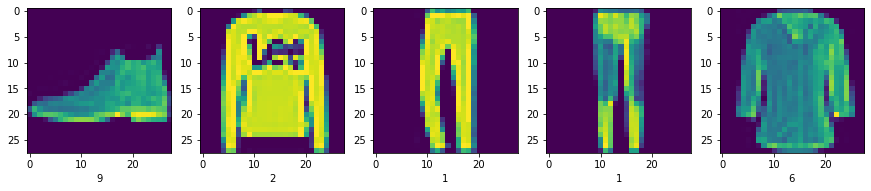

In [110]:
N = 5
y_pred = model1.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  